In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/home/sionc/Documents/autoscout24-germany-dataset.csv")
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


The main objective of this notebook is to demonstrate different linear predictive models and predict the cost of cars based on data gathered from Germany.

# Getting familiar with the data 

In [3]:
df.shape

(46405, 9)

In [4]:
df.describe()

,mileage,price,hp,year
count,4.640500e+04,4.640500e+04,46376.000000,46405.000000
mean,7.117786e+04,1.657234e+04,132.990987,2016.012951
std,6.262531e+04,1.930470e+04,75.449284,3.155214
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.980000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.099900e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


Now we see the unique values for some of our columns

In [5]:
df['fuel'].unique()

array(['Diesel', 'Gasoline', 'Electric/Gasoline', '-/- (Fuel)',
       'Electric', 'Electric/Diesel', 'CNG', 'LPG', 'Others', 'Hydrogen',
       'Ethanol'], dtype=object)

In [6]:
df['gear'].unique()

array(['Manual', 'Automatic', nan, 'Semi-automatic'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


Thus there are some null values in the columns model, gear, and hp. Let's count how many are there.

# Data cleaning

In [8]:
df.isna().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

Since the number of missing values is less than 1% of our total data, I presume it'll be okay if we drop these entries.

In [9]:
df.dropna(inplace = True)

In [10]:
#dropping duplicate rows
df.drop_duplicates(keep = 'first', inplace = True)

In [11]:
#now let's see the shape of our dataframe
df.shape

(43947, 9)

In [12]:
df.describe()

,mileage,price,hp,year
count,4.394700e+04,4.394700e+04,43947.000000,43947.000000
mean,7.231258e+04,1.654656e+04,133.624571,2015.931349
std,6.217336e+04,1.944680e+04,75.049853,3.120073
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,2.150000e+04,7.490000e+03,86.000000,2013.000000
50%,6.130900e+04,1.099000e+04,116.000000,2016.000000
75%,1.060000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


Adding an Age column

In [13]:
from datetime import datetime

In [14]:
df['age'] = datetime.now().year - df['year']

In [15]:
df.drop('year',axis = 1, inplace = True)

In [16]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,age
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,10
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,10
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,10
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,10
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,10


# Exploratory Data Analysis

In [17]:
M = df.price.median()
M

10990.0

In [18]:
m = df.price.mean()
m

16546.56379275036

In [19]:
below_M = df.query("price<10990")
no_below_M = below_M.value_counts().sum()

above_M = df.query("price > 10990.1")
no_above_M = above_M.value_counts().sum()

print(f'Median = {M}')
print('Number of cars with values above the median')
print(no_above_M)
print('Number of cars with values below the median')
print(no_below_M)
print('--------------------------------------------')

below_m = df.query("price<16546")
no_below_m = below_m.value_counts().sum()

above_m = df.query("price > 16546.1")
no_above_m = above_m.value_counts().sum()

print(f'Median = {m}')
print('Number of cars with values above the mean')
print(no_above_m)
print('Number of cars with values below the mean')
print(no_below_m)

Median = 10990.0
Number of cars with values above the median
21846
Number of cars with values below the median
21807
--------------------------------------------
Median = 16546.56379275036
Number of cars with values above the mean
13450
Number of cars with values below the mean
30497


<AxesSubplot:xlabel='hp', ylabel='price'>

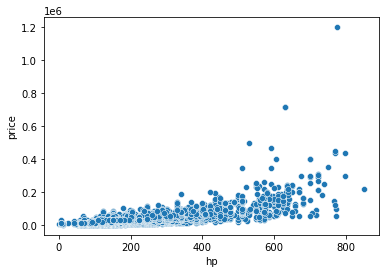

In [20]:
sns.scatterplot(x=df['hp'], y=df['price'])

In [21]:
#Changing the fuels
df['fuel'] = df['fuel'].replace('Diesel', 0)
df['fuel'] = df['fuel'].replace('Gasoline', 1)
df['fuel'] = df['fuel'].replace(['Electric/Gasoline', 'Electric/Diesel', 'Electric'],  2)
df['fuel'] = df['fuel'].replace(['CNG', 'LPG', 'Others', '-/- (Fuel)', 'Ethanol', 'Hydrogen'], 3)

In [22]:
df.fuel.unique()

array([0, 1, 2, 3])

Correlation heatmap

<AxesSubplot:>

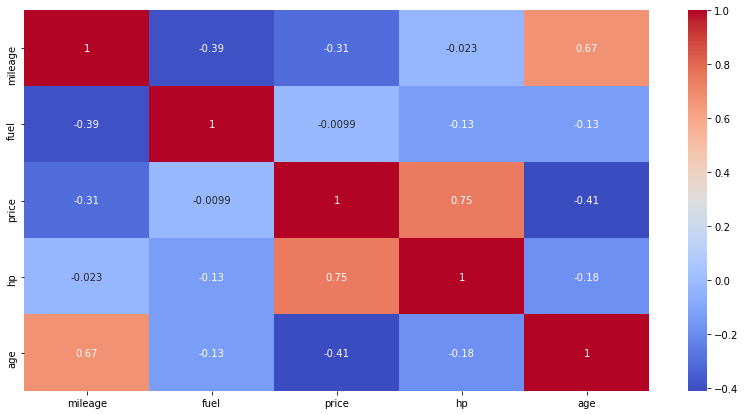

In [23]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

We find the popular cars

In [24]:
min_price, max_price = df.price.quantile([0.01, 0.99])
min_price, max_price

(3300.0, 83468.84000000004)

In [25]:
pop_cars = df[(df.price<max_price) & (df.price>min_price)]
print('Total number of cars:')
print(df.shape[0])
print('---------------------')
print('Numers of cars that are abore $3.300,0 and below $99.999,0')
print(pop_cars.shape[0])

Total number of cars:
43947
---------------------
Numers of cars that are abore $3.300,0 and below $99.999,0
43044


In [26]:
min_price, max_price = df.mileage.quantile([0.01, 0.99])
min_price, max_price

(7.0, 259170.56000000006)

In [27]:
pop_cars = pop_cars[(pop_cars.mileage<max_price) & (pop_cars.mileage>min_price)]

In [28]:
min_price, max_price = df.hp.quantile([0.01, 0.999])
min_price, max_price

(60.0, 650.0)

In [29]:
pop_cars = pop_cars[(pop_cars.hp<max_price) & (pop_cars.hp>min_price)]

In [30]:
pop_cars['fuel'] = pop_cars['fuel'].replace(0, 'Diesel')
pop_cars['fuel'] = pop_cars['fuel'].replace(1, 'Gasoline')
pop_cars['fuel'] = pop_cars['fuel'].replace(2, 'Electric')
pop_cars['fuel'] = pop_cars['fuel'].replace(3, 'Others')

In [31]:
pop_cars = pop_cars.reset_index(drop=True)

# One hot encoding and K-Folds

In [32]:
pop_cars = pop_cars.drop(columns=['make', 'model'], axis=1)
pop_cars.head()

,mileage,fuel,gear,offerType,price,hp,age
0,235000,Diesel,Manual,Used,6800,116.0,10
1,92800,Gasoline,Manual,Used,6877,122.0,10
2,149300,Gasoline,Manual,Used,6900,160.0,10
3,96200,Gasoline,Manual,Used,6950,110.0,10
4,156000,Gasoline,Manual,Used,6950,156.0,10


In [33]:
pop_cars.dtypes.value_counts()

int64      3
object     3
float64    1
dtype: int64

In [34]:
mask = pop_cars.dtypes == np.object
categorical = pop_cars.columns[mask]
categorical

Index(['fuel', 'gear', 'offerType'], dtype='object')

In [35]:
num_ohc_cols = (pop_cars[categorical].apply(lambda x: x.nunique()).sort_values(ascending=False))
num_ohc_cols

offerType    5
fuel         4
gear         3
dtype: int64

In [36]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

data_ohc = pop_cars.copy()

ohc = OneHotEncoder()

for col in num_ohc_cols.index:
  #this is a sparse array
  new_dat = ohc.fit_transform(data_ohc[[col]])
  #drop original column from original DF
  data_ohc = data_ohc.drop(col, axis=1)
  #get unique names of columns
  cats = ohc.categories_
  #create a column for each OHE column by value
  new_cols = ['_'.join([col,cat]) for cat in cats[0]]
  #create the new Dataset
  new_df = pd.DataFrame(new_dat.toarray(), columns=new_cols)
  #append new data to df
  data_ohc=pd.concat([data_ohc, new_df], axis=1)

y_col = 'price'

feature_cols = [x for x in data_ohc.columns if x != y_col]

X = data_ohc[feature_cols]
y = data_ohc[y_col]

In [37]:
X.head()

,mileage,hp,age,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used,fuel_Diesel,fuel_Electric,fuel_Gasoline,fuel_Others,gear_Automatic,gear_Manual,gear_Semi-automatic
0,235000,116.0,10,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,92800,122.0,10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,149300,160.0,10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,96200,110.0,10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,156000,156.0,10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [38]:
from sklearn.model_selection import KFold

kf = KFold(shuffle=True, random_state=72018, n_splits=3)

kf.split(X)

<generator object _BaseKFold.split at 0x7f5a5da75970>

This creates a Tuple, for 3 different scenarios(n_plits), that is: train_index, test_index

In [39]:
for train_index, test_index in kf.split(X):
  print("Train index:", train_index[:10], len(train_index))
  print("Test index:", test_index[:10], len(test_index))
  print('')

Train index: [ 0  2  4 10 11 12 13 16 19 20] 26924
Test index: [ 1  3  5  6  7  8  9 14 15 17] 13463

Train index: [0 1 2 3 4 5 6 7 8 9] 26925
Test index: [11 12 13 16 19 20 23 26 32 37] 13462

Train index: [ 1  3  5  6  7  8  9 11 12 13] 26925
Test index: [ 0  2  4 10 24 29 33 34 43 45] 13462



# Modeling

Linear regression without regularization

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

scores = []
lr = LinearRegression()

for train_index, test_index in kf.split(X):
  X_train, X_test, y_train, y_test = (X.iloc[train_index, :], X.iloc[test_index, :], y[train_index], y[test_index])
  
  lr.fit(X_train, y_train)

  y_pred = lr.predict(X_test)

  score = r2_score(y_test.values, y_pred)

  scores.append(score)

scores

[0.8287930876292234, 0.8297633896297357, 0.8390539858927717]

Linear regression with Regularization

In [41]:
from sklearn.preprocessing import StandardScaler

scores = []
lr = LinearRegression()
s = StandardScaler()

for train_index, test_index in kf.split(X):
  X_train, X_test, y_train, y_test = (X.iloc[train_index, :], X.iloc[test_index, :], y[train_index], y[test_index])
  
  X_train_s = s.fit_transform(X_train)
  
  lr.fit(X_train_s, y_train)

  X_test_s = s.transform(X_test)

  y_pred = lr.predict(X_test_s)

  score = r2_score(y_test.values, y_pred)

  scores.append(score)

scores

[0.8287665996258867, 0.829763389629736, 0.8390557075678731]

Linear Regression with Regu, Pipeline com Cross Val Predict

In [42]:
# doing what we did above with Pipeline
from sklearn.pipeline import Pipeline

estimator = Pipeline([('scaler', s), ('linear_reg', lr)])

estimator.fit(X_train, y_train)

estimator.predict(X_test)

array([  337.54394193,  7509.40035959,  6646.10113076, ...,
       30315.43070237, 16273.01217139, 19866.976231  ])

In [43]:
kf

KFold(n_splits=3, random_state=72018, shuffle=True)

In [44]:
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(estimator, X, y, cv=kf, verbose=100)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished


In [45]:
len(predictions)

40387

In [46]:
r2_score(y, predictions)

0.8326247491666151

In [47]:
np.mean(scores)

0.832528565607832

We can see that this is almost the same. Linear Regression doestn change much with Regularization

# Linear Regression with Polynomial Regularization

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold

polis = [2, 3, 4]

lr1 = LinearRegression()

scores = []

for poli in polis:
  pf = PolynomialFeatures(poli)

  estimator = Pipeline([('make_higher_degree', pf), ('linear_reg', lr1)])

  predictions = cross_val_predict(estimator, X, y, cv=kf, verbose=100)

  score = r2_score(y, predictions)

  scores.append(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.0

In [49]:
list(zip(polis, scores))

[(2, 0.8834636269383815), (3, 0.816677589576142), (4, -1026.6737588070525)]

# Part 2

Lasso with Regularization

In [50]:
import numpy as np

alphas = np.geomspace(1e-9, 1e-0, num=10)
alphas

from sklearn.linear_model import Lasso


scores_lasso = []
coefs = []

for alpha in alphas:
  las = Lasso(alpha=alpha, max_iter=100000)

  estimator = Pipeline([('scaler', s), ('lasso_regression', las)])

  predictions = cross_val_predict(estimator, X, y, cv=kf, verbose=100)

  score = r2_score(y, predictions)

  scores.append(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0

In [51]:
list(zip(alphas, scores))

[(1e-09, 0.8834636269383815),
 (1e-08, 0.816677589576142),
 (1e-07, -1026.6737588070525),
 (1e-06, 0.8326345628952265),
 (1e-05, 0.8326345628952242),
 (0.0001, 0.8326345628952051),
 (0.001, 0.8326345628949767),
 (0.01, 0.8326345628930603),
 (0.1, 0.8326345628771654),
 (1.0, 0.8326345625595094)]

In [52]:
Lasso(alpha=1e-6).fit(X,y).coef_

array([-5.82039106e-02,  1.19992840e+02, -9.03879758e+02,  4.32195365e+03,
        2.31284074e+03, -2.07261263e+03,  4.09006018e+02, -4.10741271e+01,
        2.87584825e+03,  1.08690577e+03, -7.50785871e+01,  6.28936501e+02,
        2.62197159e+03, -8.83508501e+00,  1.76298304e+03])

In [53]:
Lasso(alpha=1).fit(X,y).coef_

array([-5.82086845e-02,  1.20029186e+02, -9.04381110e+02,  3.87211162e+03,
        1.84442980e+03, -0.00000000e+00, -0.00000000e+00, -4.68312456e+02,
        2.09285825e+03,  2.81222506e+02, -8.53498524e+02, -0.00000000e+00,
        8.72766429e+02, -1.75599699e+03,  0.00000000e+00])

Lasso with polynomial regularization

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

pf = PolynomialFeatures(degree=3)

scores = []
alphas = np.geomspace(9, 12, 4)
# alphas = np.geomspace(0.001, 10, 5)

for alpha in alphas:
  las = Lasso(alpha=alpha, max_iter=10000)

  estimator = Pipeline([('make_higher_degree', pf), ('scaler', s), ('lasso_regression', las)])

  predictions = cross_val_predict(estimator, X, y, cv=kf, verbose=100)

  score = r2_score(y, predictions)

  scores.append(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   54.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.3

In [55]:
alphas

array([ 9.        ,  9.90578175, 10.90272356, 12.        ])

In [56]:
scores

[0.8792881358296342,
 0.8815238961714683,
 0.8833873929387192,
 0.8846801909901439]

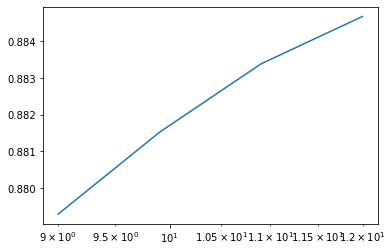

In [57]:
import matplotlib.pyplot as plt

plt.semilogx(alphas, scores)

Lasso Regression with the best estimator from above

In [58]:
best_estimator = Pipeline([('make_higher_degree', PolynomialFeatures(degree=2)), ('scaler', s), ('lasso_regression', Lasso(alpha=10, max_iter=100000))])

best_estimator.fit(X,y)
best_estimator.score(X,y)

0.8855454953727971

In [59]:
best_estimator.named_steps['lasso_regression'].coef_

array([ 0.00000000e+00, -1.28242721e+03,  9.17807383e+03, -2.39169074e+03,
        4.85641438e+01,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  5.44849543e+02, -0.00000000e+00, -2.83380854e+01,
        1.43757186e+03, -3.07886318e+03,  1.30720385e+03,  8.57987791e+01,
       -3.18185380e+01, -1.06503411e-02,  1.86014726e+01, -3.84093296e+02,
       -1.23340434e+03,  7.57644298e+00,  0.00000000e+00, -6.65076594e+01,
       -2.99026522e+02, -0.00000000e+00, -8.16579082e+01, -3.19932737e+02,
       -2.60691319e+03,  2.09771587e+02, -1.85598398e+01, -1.51649646e-01,
       -0.00000000e+00,  0.00000000e+00,  2.27595315e+03,  6.18609672e+01,
       -0.00000000e+00,  0.00000000e+00,  1.95076369e+03, -0.00000000e+00,
        4.68860267e+02,  1.29569354e+03, -2.52308888e+02,  2.26517442e+01,
        0.00000000e+00,  1.67017898e+01, -0.00000000e+00, -6.30795269e+02,
       -0.00000000e+00,  

Text(0, 0.5, 'Rˆ2')

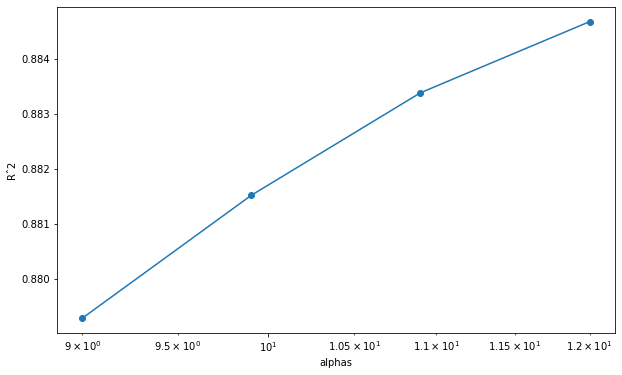

In [60]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('alphas')
plt.ylabel('Rˆ2')

Ridge Regression

In [61]:
X.shape

(40387, 15)

In [62]:
y.shape

(40387,)

In [63]:
from sklearn.linear_model import Ridge

pf = PolynomialFeatures(degree=2)

alphas = np.geomspace(0.1,2,20)

scores=[]

for alpha in alphas:
  ridge = Ridge(alpha=alpha, max_iter=100000)

  estimator = Pipeline([('make_higher_degree', pf), ('scaler', s), ('ridge', ridge)])

  predictions = cross_val_predict(estimator, X, y, cv=kf, verbose=100)
  score=r2_score(y, predictions)
  scores.append(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0

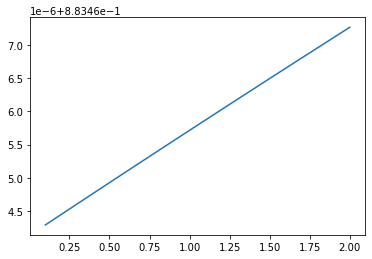

In [64]:
plt.plot(alphas, scores)

In [65]:
best_estimator = Pipeline([('make_higher_degree', PolynomialFeatures(degree=2, include_bias=False)), ('scaler', s), ('lasso_regression', Lasso(alpha=10))])

best_estimator.fit(X,y)
best_estimator.score(X,y)

0.8855454953727971

In [66]:
fs_importances = pd.DataFrame(zip(best_estimator.named_steps['make_higher_degree'].get_feature_names(input_features=X.columns), best_estimator.named_steps['lasso_regression'].coef_,))

In [67]:
fs_importances.sort_values(by=1)

,0,1
16,mileage hp,-3078.863175
31,hp age,-2606.913187
2,age,-2391.690736
0,mileage,-1282.427215
23,mileage fuel_Diesel,-1233.404340
...,...,...
17,mileage age,1307.203849
15,mileage^2,1437.571863
41,hp gear_Automatic,1950.763691
37,hp fuel_Diesel,2275.953149
